# `Pandas`

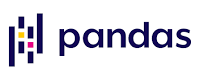


The `pandas` library is practically use for any data manipulation task in python. As a result, learning `pandas` is a great skill to have as data scientists. 

During this class time we will be using the `colleges_dataset_not_cleaned.csv` datset we made last class after web scraping money.com 

Before we do anything lets first explore the datasets first (visually)

Lets first start off by importing the `pandas` and `numpy` libraries

In [ ]:
import pandas as pd
pd.options.display.max_columns = 30
import numpy as np

Before we can even do anything to this dataset we need to load it. Load in the dataset using `pandas` below.

## Exploring the Data

Awesome, now lets explore the datset with `pandas`

In [ ]:
college_df.head()

In [ ]:
college_df.shape

In [ ]:
college_df.dtypes

Notice that we can't really do much with this data because it is very messy.

## Cleaning the Data

First lets delete the column `Unnamed: 0`, this is bascially the index, but we don't need this since `pandas` does this for us

### Expanding Columns

Now lets expand some of these columns. Create the following columns - 

1) `Town` and `State` that are the town and state of their respectize college

2) `median_sat` and `median_act` that are the sat and act of the respective college

Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html

Notice how the original columns are still there, drop these columns inplace

Try doing something similar with the `avg_time_to_a_degree` columns. How can we get rid of the string 'years'.

### Dealing With Whitespace

Print out the 3rd element of the first row, what do you notice?

How do we get rid of the problem above? Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html

In the cell below replace all the values of columns with whitespace without any whitespace

### Exploring Missing Values

Now lets explore some of the missing values.

`pandas` is smart, so it is able to detect the missing values even though we initially read them in as strings, notice how the column types are still also objects. 

In [ ]:
college_df.isnull().sum()

If we look at the data we can see where some of these `NaN` values are coming from (California State University, Channel Islands)

So pandas can detect the `NaN` values but how about this: https://money.com/best-colleges/profile/ringling-college-of-art-and-design/

In [ ]:
np.sum(college_df['median_sat'] == 'NA') + np.sum(college_df['median_act'] == 'NA')

In [ ]:
np.sum(college_df == 'NA', axis = 0) + np.sum(college_df == 'N/A', axis = 0)

In [ ]:
n_cols = np.array(np.sum(college_df == 'NA', axis = 0) + np.sum(college_df == 'N/A', axis = 0)  > 0)
n_cols

In [ ]:
college_df.iloc[:, n_cols] = college_df.iloc[:, n_cols].replace(["NA", "N/A"], np.nan)

In [ ]:
college_df.isna().sum()

Let will talk about how to deal with this a bit later :)

## Changing Series types

In [ ]:
college_df.dtypes

In [ ]:
print(college_df["overall_score"][0])
type(college_df["overall_score"][0])

In [ ]:
college_df["median_sat"] = college_df["median_sat"].astype('float64')
college_df["median_act"] = college_df["median_act"].astype('float64')

In [ ]:
college_df.dtypes

## Reformatting Values

Reformat strings

In [ ]:
# write the function here, reformat()

In [ ]:
for col in college_df.columns.difference(['overall_score', 'median_sat', 'median_act', 'avg_time_to_a_degree', 'Town', 'State', 'college_names', 'sat_act_required']):
    college_df[col] = college_df[col].apply(reformat)

In [ ]:
college_df.head()

Finish changing dtypes

In [ ]:
college_df["sat_act_required"] = college_df["sat_act_required"].astype('string')
college_df["college_names"] = college_df["college_names"].astype('string')
college_df["Town"] = college_df["Town"].astype('string')
college_df["State"] = college_df["State"].astype('string')

In [ ]:
college_df.dtypes

In [ ]:
for col in college_df.columns.difference(['overall_score', 'median_sat', 'median_act', 'avg_time_to_a_degree', 'Town', 'State', 'college_names', 'sat_act_required']):
    college_df[col] = college_df[col].astype('float64')

In [ ]:
college_df.dtypes

### Imputing Missing Values

In [ ]:
college_df.isnull().sum()

In [ ]:
college_df.median()

In [ ]:
college_df = college_df.fillna(college_df.median()) 

In [ ]:
college_df.isna().sum()

### Renaming Columns

In [ ]:
college_df.rename(columns = {'avg_time_to_a_degree':'avg_time_to_a_degree_years'}, inplace = True)

### Saving a file

In [ ]:
college_df.to_csv("colleges_dataset_cleaned.csv")